In [1]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
!pip install h2o


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697886 sha256=f85f7c329f8a3effc5227de1cd615a3eb856cd34cb67479ae67b232f43301d19
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o


In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 42.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095473 sha256=d31ec92ae0244cb769df1ed5bd4c44323e1e2db8c24e8543d367dfb43fdec629
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import SVD, Dataset, Reader, accuracy
import h2o


In [3]:
colab_path = '/content/drive/MyDrive/ColabNotebooks/제2회 코스포 x 데이콘 도서 추천 알고리즘 AI경진대회(채용 연계형)/'

In [4]:
train = pd.read_csv(colab_path+'/train.csv')
test = pd.read_csv(colab_path+'/test.csv')

In [ ]:
train.loc[train['Year-Of-Publication'] == 2005, :]


,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
11726,TRAIN_011726,USER_01406,BOOK_242924,0,35,"bagshot, surrey, united kingdom","PS, I Love You",Cecelia Ahern,2005.0,Hyperion
20003,TRAIN_020003,USER_02076,BOOK_102434,8,63,"albuquerque, new mexico, usa",The Five Love Languages: Five Love Languages,Gary Chapman,2005.0,Moody Publishers
23375,TRAIN_023375,USER_02575,BOOK_102434,0,28,"saugus, massachusetts, usa",The Five Love Languages: Five Love Languages,Gary Chapman,2005.0,Moody Publishers
29045,TRAIN_029045,USER_03215,BOOK_102434,8,30,"farmington hills, michigan, usa",The Five Love Languages: Five Love Languages,Gary Chapman,2005.0,Moody Publishers
47056,TRAIN_047056,USER_04601,BOOK_102434,0,28,"duluth, minnesota, usa",The Five Love Languages: Five Love Languages,Gary Chapman,2005.0,Moody Publishers
...,...,...,...,...,...,...,...,...,...,...
833089,TRAIN_833089,USER_87556,BOOK_059042,0,28,"manchester, england, united kingdom","Ninth Life of Louis Drax, The -POSTPONED",Liz Jensen,2005.0,Bloomsbury USA
846802,TRAIN_846802,USER_89542,BOOK_166042,0,35,"middle park, victoria, australia",Red Dwarf,Grant Naylor,2005.0,Penguin Books Ltd
851752,TRAIN_851752,USER_90042,BOOK_231698,0,30,"fairbanks, alaska, usa",Thereby Hangs a Tale,Charles E. Funk,2005.0,HarperResource
863588,TRAIN_863588,USER_91307,BOOK_166042,8,44,"new plymouth, taranaki, new zealand",Red Dwarf,Grant Naylor,2005.0,Penguin Books Ltd


In [ ]:
#train = train[train['Year-Of-Publication'] != -1]
#train

In [14]:
print(sorted(train.unique()))

AttributeError: ignored

In [7]:
# retrieving age data between 5 to 90
train.loc[(train['Age'] > 90) | (train['Age'] < 5)] = np.nan

In [8]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [9]:
train['Age'].isnull().sum()

0

In [10]:
train['Age'] = train['Age'].astype(int)

In [11]:
print(sorted(train.Age.unique()))
print(train.Age.value_counts())

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90]
35    251455
33     27349
36     26109
29     25456
30     23085
       ...  
84        34
85        13
6         12
86         2
89         2
Name: Age, Length: 84, dtype: int64


In [12]:
#train = train[train['Year-Of-Publication'] >= 1980]
train = train[train['Year-Of-Publication'] < 2005]


In [13]:
print(train['Book-Rating'].shape)

(866810,)


In [ ]:
# Collaborative Filtering Based Recommendation Systems
# For more accurate results only consider users who have rated atleast 520 books

In [ ]:
counts1 = pd.value_counts(train['User-ID'])
counts1

USER_56601    11141
USER_54845     6455
USER_52453     5813
USER_73501     4289
USER_03411     3453
              ...  
USER_45191        1
USER_45192        1
USER_45193        1
USER_45195        1
USER_92100        1
Name: User-ID, Length: 83244, dtype: int64

In [ ]:
counts1[counts1 >= 100]

USER_56601    11141
USER_54845     6455
USER_52453     5813
USER_73501     4289
USER_03411     3453
              ...  
USER_34652      100
USER_02386      100
USER_45666      100
USER_84698      100
USER_60037      100
Name: User-ID, Length: 1399, dtype: int64

In [ ]:
train_new = train[train['User-ID'].isin(counts1[counts1 >= 100].index)]

In [ ]:
train_new.shape

(687812, 10)

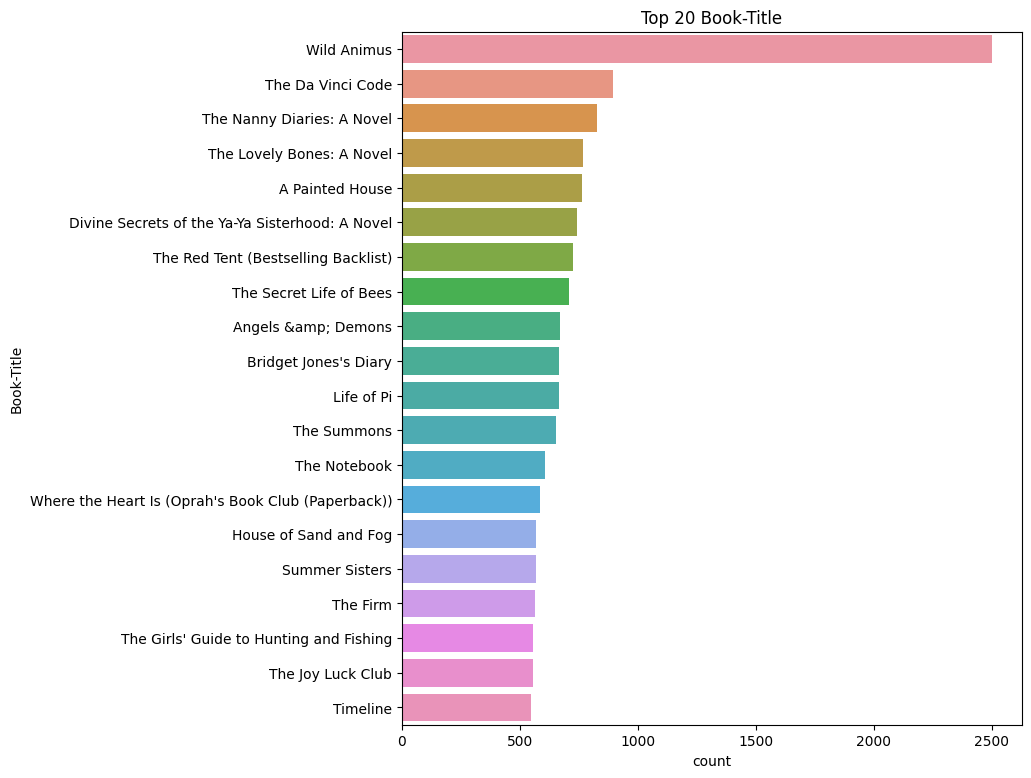

In [ ]:
ds = train['Book-Title'].value_counts().reset_index()
ds.columns = ['Book-Title', 'count']
ds = ds.sort_values('count', ascending=False).head(20)
plt.figure(figsize=(8, 9))
sns.barplot(data=ds, x='count', y='Book-Title')
plt.title('Top 20 Book-Title')
plt.xlabel('count')
plt.ylabel('Book-Title')
plt.show()

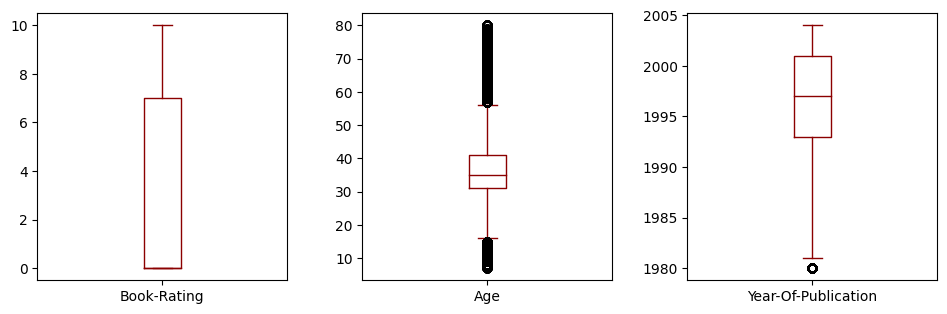

In [ ]:
train.plot(subplots =True, kind = 'box', layout = (4,5), figsize = (20,17), color = 'DarkRed')
plt.subplots_adjust(wspace = 0.3, hspace= 0.3)

In [ ]:
h2o.init()
h2o_data = h2o.H2OFrame(train)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmppq9ofsd9
  JVM stdout: /tmp/tmppq9ofsd9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmppq9ofsd9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_x6npfu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
x = h2o_data.columns
y = "Book-Rating"
x.remove(y)

In [ ]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(
    max_models=10,
    seed=42,
    max_runtime_secs=360,
    sort_metric='RMSE'

)

aml.train(
    x=x,
    y=y,
    training_frame=h2o_data
)

leaderboard = aml.leaderboard
print(leaderboard.head())

AutoML progress: |
15:59:41.670: _train param, Dropping bad and constant columns: [ID]

███████████████████████████████████████████████████████████████| (done) 100%
model_id                               rmse      mse     mae    rmsle    mean_residual_deviance
XGBoost_1_AutoML_1_20230509_155940  3.75062  14.0671  3.3071  1.09432                   14.0671
[1 row x 6 columns]



In [ ]:
model = aml.leader

In [ ]:
pred = model.predict(test)


xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'Book-ID' has levels not trained on: ["BOOK_000000", "BOOK_000013", "BOOK_000014", "BOOK_000019", "BOOK_000025", "BOOK_000048", "BOOK_000053", "BOOK_000056", "BOOK_000059", "BOOK_000073", ...26600 not listed..., "BOOK_269927", "BOOK_269973", "BOOK_269983", "BOOK_269984", "BOOK_269986", "BOOK_270010", "BOOK_270021", "BOOK_270038", "BOOK_270046", "BOOK_270048"]
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'Book-Title' has levels not trained on: [" Dark Justice", " Stories of an Imaginary Childhood", " Tales of Terror and Suspense", " The Town Cats and Other Tales", ""Ain't You Glad You Joined the Republicans?": A Short History of the Gop", ""Angler's Mail" A-Z Encyclopedia of Fishing in the British Isles", ""Any Grooming Hints for Your Fans, Rollie?" (A Doonesbury book)", ""F" Is for Fugitive : A Kinsey Millhone Myster

In [ ]:
pred_df = pd.DataFrame(pred.as_data_frame())


NameError: ignored

In [ ]:
pred_df['predict']

0         2.527085
1         2.527085
2         2.311117
3         2.527085
4         2.311117
            ...   
159616    3.316614
159617    3.316614
159618    2.853950
159619    2.853950
159620    3.316614
Name: predict, Length: 159621, dtype: float64

In [ ]:
submit  = pd.read_csv(colab_path + '/sample_submission.csv')

In [ ]:
submit['Book-Rating'] = pred_df['predict']


In [ ]:
submit['Book-Rating']

0         2.844789
1         3.197025
2         2.998634
3         2.921699
4         2.669293
            ...   
159616    4.099040
159617    4.053930
159618    3.652415
159619    3.900649
159620    4.053930
Name: Book-Rating, Length: 159621, dtype: float64

In [ ]:
submit.to_csv('./svd25.csv', index=False)